### Cargar los Datos de Calidad de Agua

Lo primero que debemos hacer es abrir el archivo que contiene los datos que vamos a analizar. En este caso, el archivo se llama **"Calidad_de_agua_2021"**.

Para cargar el archivo en Python, utilizaremos la biblioteca `pandas`, que es ideal para manejar datos en formato de tablas (como CSV, Excel, etc.). A continuación, veremos cómo cargar este archivo y revisar sus primeras filas para asegurarnos de que todo está correcto.


In [85]:
# Importamos la librería pandas para el manejo de datos
import pandas as pd

# Cargamos el archivo "Calidad_de_agua_2021.csv" utilizando un delimitador personalizado (punto y coma)
raw_dataset = pd.read_csv("Calidad_de_agua_2021.csv", delimiter=';')

# Hacemos una copia del dataset original para realizar el preprocesamiento sin modificar los datos originales
preprocessed_dataset = raw_dataset.copy()

# Eliminamos columnas irrelevantes:
# - 'año': todas las mediciones son del año 2021, no aporta información adicional
# - 'orden', 'codigo': no son útiles para el análisis
# - 'fecha': la información sobre la fecha ya está contenida en la columna 'estación' y no varian durante la epoca
preprocessed_dataset = preprocessed_dataset.drop(['año', 'orden', 'codigo', 'fecha'], axis=1)

# Reemplazamos los valores 'no se midió' por valores nulos (NaN), para tratar los datos no medidos como ausentes
preprocessed_dataset = preprocessed_dataset.replace('no se midió', pd.NA)

# Eliminamos todas las filas que contienen valores nulos, ya que no queremos trabajar con datos incompletos
preprocessed_dataset = preprocessed_dataset.dropna()

## Exploración de la Información de la Base de Datos

Una vez que hemos cargado y limpiado los datos, es importante verificar la estructura general de nuestro conjunto de datos. Para esto, utilizamos el método `info()` de pandas, el cual nos proporciona una visión general de las columnas, el número de entradas no nulas, el tipo de datos de cada columna y el uso de memoria del DataFrame.

Este método es útil para:
- Verificar si hay columnas con valores nulos.
- Observar los tipos de datos de las columnas (importante para asegurarnos de que pandas está interpretando correctamente los datos).
- Tener una idea del tamaño del conjunto de datos.

In [86]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 165
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sitios                   121 non-null    object
 1   campaña                  121 non-null    object
 2   tem_agua                 121 non-null    object
 3   tem_aire                 121 non-null    object
 4   od                       121 non-null    object
 5   ph                       121 non-null    object
 6   olores                   121 non-null    object
 7   color                    121 non-null    object
 8   espumas                  121 non-null    object
 9   mat_susp                 121 non-null    object
 10  colif_fecales_ufc_100ml  121 non-null    object
 11  escher_coli_ufc_100ml    121 non-null    object
 12  enteroc_ufc_100ml        121 non-null    object
 13  nitrato_mg_l             121 non-null    object
 14  nh4_mg_l                 121 non-null    object

### Revisión de Tipos de Datos

Al examinar la información del conjunto de datos utilizando el método `info()`, hemos notado que **todas las columnas están clasificadas como de tipo `object`**. Sin embargo, sabemos que muchas de estas columnas contienen valores numéricos, lo que indica que el tipo de dato no ha sido interpretado correctamente por pandas.

Este es un problema común cuando se trabaja con archivos CSV u otros formatos, especialmente si los datos numéricos están representados como cadenas de texto (strings) debido a la forma en que se almacenaron o se importaron.

#### ¿Por qué es importante corregir esto?
Es fundamental que las columnas que deberían contener valores numéricos sean tratadas como tales. Esto permitirá:
- Realizar cálculos y análisis estadísticos correctos.
- Evitar errores o resultados incorrectos debido a la manipulación de datos como texto.

A continuación, corregiremos los tipos de datos para asegurar que las columnas con valores numéricos sean reconocidas y tratadas como tales.

#### Limpieza y Conversión de Tipos de Datos

En este paso, hemos realizado varias transformaciones y conversiones en algunas de las columnas del conjunto de datos:

##### 1. **Reemplazo de valores de texto por valores booleanos**:
Las columnas **'color'**, **'olores'**, **'espumas'** y **'mat_susp'** contenían valores de texto como `'Ausencia'` y `'Presencia'`, los cuales representaban la presencia o ausencia de ciertas características. Para facilitar el análisis, hemos reemplazado estos valores de texto por valores booleanos:

- **'Ausencia'** (y sus variaciones, como `'ausenca'`, `'Ausencia '`) ha sido reemplazado por **`False`**.
- **'Presencia'** ha sido reemplazado por **`True`**.

Este cambio nos permitirá trabajar con datos binarios y realizar análisis más fácilmente.


In [87]:
# Reemplazo de valores de texto por booleanos en varias columnas
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(['ausenca', 'Ausencia ', 'Ausencia'], False)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace('Presencia', True)

preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(['ausenca', 'Ausencia ', 'Ausencia'], False)
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace('Presencia', True)

preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(['ausenca', 'Ausencia ', 'Ausencia'], False)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace('Presencia', True)

preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(['ausenca', 'Ausencia ', 'Ausencia'], False)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace('Presencia', True)

# Conversión de tipos de datos a numéricos (float y int)
preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].astype(float)
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].astype(float)
preprocessed_dataset['od'] = preprocessed_dataset['od'].astype(float)
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].astype(float)

preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].astype(int)
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].astype(int)
preprocessed_dataset['ica'] = preprocessed_dataset['ica'].astype(int)


C:\Users\marti\AppData\Local\Temp\ipykernel_8332\3161306474.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_dataset['color'] = preprocessed_dataset['color'].replace('Presencia', True)
C:\Users\marti\AppData\Local\Temp\ipykernel_8332\3161306474.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace('Presencia', True)
C:\Users\marti\AppData\Local\Temp\ipykernel_8332\3161306474.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and

#### Filtrado y Corrección de Valores en la Columna `colif_fecales_ufc_100ml`

En este paso, hemos realizado una serie de transformaciones en la columna **`colif_fecales_ufc_100ml`** que contiene las concentraciones de coliformes fecales en unidades formadoras de colonias por 100 ml (UFC/100ml). La razón de estas transformaciones es la detección de valores atípicos y el tratamiento de los datos para mejorar la calidad del análisis.

**Reemplazo de valores extremos por un valor plausible**:
Se observó que algunos valores en esta columna eran excesivamente altos (por ejemplo, valores mayores a 100,000). Para manejar esto:
- Los valores que eran mayores a 100,000 se reemplazaron por **100,000**, ya que esto parece ser un valor razonable para el rango de datos que estamos manejando.

In [88]:
# Reemplazamos valores mayores a 100,000 por 10,000, ya que creemos que fue un error de tipeo
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace('>100000', 10000)
# Convertimos la columna a tipo entero para realizar cálculos y análisis
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].astype(int)

# Reemplazamos los valores mayores a 20,000 por NaN, ya que los consideramos atípicos
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].where(preprocessed_dataset['colif_fecales_ufc_100ml'] <= 10000, pd.NA)


#### Tratamiento de las Columnas `nitrato_mg_l` y `colif_fecales_ufc_100ml`

**Reemplazo del valor `<2.0` por `2` en la columna `nitrato_mg_l`**:
En la columna **`nitrato_mg_l`** (concentración de nitratos en el agua, en mg/L), algunos valores están representados como **`<2.0`**, lo cual indica que la concentración de nitratos es inferior a 2 mg/L. Este formato no es numérico, lo que impide realizar cálculos y análisis de manera adecuada.

Por lo tanto, reemplazamos el valor **`<2.0`** por **`2`**, el límite inferior de la medición, para convertirlo en un valor numérico que podamos usar en cálculos.

Algunos valores son extremadamente altos y no son representativos de la realidad de los datos 


In [89]:
# Reemplazamos el valor '<2.0' por '2' para poder realizar cálculos numéricos
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].replace(['<2.0'], '2')

# Convertimos la columna a tipo float para poder realizar análisis numéricos
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].astype(float)

# Reemplazamos los valores mayores a 10 por NaN, ya que los consideramos atípicos
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].where(preprocessed_dataset['nitrato_mg_l'] <= 10, pd.NA)

#### Tratamiento de la Columna `nh4_mg_l`

**Reemplazo de valores con `<0.05`**:
En la columna **`nh4_mg_l`** (concentración de amonio en el agua, en mg/L), algunos valores están representados como **`<0.05`**, lo cual indica que la concentración de amonio es inferior a 0.05 mg/L. Al ser un valor no numérico, no es posible realizar cálculos con él.

Algunos valores son extremadamente altos y no son representativos de la realidad de los datos 


In [90]:
# Reemplazamos el valor '<0.05' por '0.05' para poder realizar cálculos numéricos
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].replace('<0.05', '0.05')

# Convertimos la columna a tipo float para poder realizar análisis numéricos
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].astype(float)

# Reemplazamos los valores mayores a 10 por NaN, ya que los consideramos atípicos
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].where(preprocessed_dataset['nh4_mg_l'] <= 10, pd.NA)

#### Tratamiento de la Columna `p_total_l_mg_l`

**Reemplazo del valor `<0.20` por `0.20` en la columna `p_total_l_mg_l`**:
En la columna **`p_total_l_mg_l`** (concentración de fósforo total en el agua, en mg/L), algunos valores están representados como **`<0.20`**, lo que indica que la concentración de fósforo es inferior a **0.20 mg/L**. Este formato no es numérico y no se puede utilizar para realizar cálculos.

Por lo tanto, reemplazamos el valor **`<0.20`** por **`0.20`**, que es el límite inferior de la medición, para convertirlo en un valor numérico adecuado para el análisis.

Considerando que el rango típico de concentración de fósforo en ambientes acuáticos es relativamente bajo, hemos decidido reemplazar los valores mayores a 1.5 mg/L por NaN.

In [91]:
# Reemplazamos el valor '<0.20' por '0.20' para poder realizar cálculos numéricos
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].replace('<0.20', '0.20')

# Convertimos la columna a tipo float para poder realizar análisis numéricos
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].astype(float)

# Reemplazamos los valores mayores a 1.5 por NaN, ya que los consideramos atípicos
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].where(preprocessed_dataset['p_total_l_mg_l'] <= 1.5, pd.NA)

#### Tratamiento de la Columna `fosf_ortofos_mg_l`

##### 1. **Reemplazo de valores con `<0.10` y `<0.20`**:
En la columna **`fosf_ortofos_mg_l`** (concentración de ortofosfatos en el agua, en mg/L), algunos valores están representados como **`<0.10`** o **`<0.20`**, lo cual indica que la concentración de ortofosfatos es inferior a esos valores. Estos formatos no son numéricos y deben ser reemplazados para poder realizar cálculos con los datos.

Reemplazamos estos valores por **`0.10`** y **`0.20`**, respectivamente, ya que son los límites inferiores de las mediciones, lo que nos permitirá utilizarlos en análisis numéricos.

In [92]:
# Reemplazamos el valor '<0.10' por '0.10' y '<0.20' por '0.20' para poder realizar cálculos numéricos
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.10', '0.10')
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.20', '0.20')

# Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].astype(float)

# Reemplazamos los valores mayores a 1 por NaN, ya que los consideramos atípicos
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].where(preprocessed_dataset['fosf_ortofos_mg_l'] <= 1, pd.NA)

#### Tratamiento de la Columna `dbo_mg_l`

##### 1. **Reemplazo de valores con `<2.0` y `<5`**:
En la columna **`dbo_mg_l`** (Demanda Biológica de Oxígeno en el agua, en mg/L), algunos valores están representados como **`<2.0`** o **`<5`**, lo que indica que la concentración de oxígeno disuelto es inferior a estos valores. Al ser un formato no numérico, no podemos realizar cálculos con estos datos.

Para permitir el análisis numérico, reemplazamos estos valores por **`2.0`** y **`5`**, que son los límites inferiores de las mediciones, respectivamente.

In [93]:
# Reemplazamos el valor '<2.0' por '2.0' y '<5' por '5' para poder realizar cálculos numéricos
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace('<2.0', '2.0')
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace('<5', '5')

# Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].astype(float)

# Reemplazamos los valores mayores a 10 por NaN, ya que los consideramos atípicos
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].where(preprocessed_dataset['dbo_mg_l'] <= 10, pd.NA)

#### Tratamiento de la Columna `dqo_mg_l`

**Reemplazo de valores no válidos**:
En la columna **`dqo_mg_l`** (Demanda Química de Oxígeno en el agua, en mg/L), algunos valores están representados como **`<2.0`**, **`4.5`** o **`9,8`** (comas en lugar de puntos). Estos valores no son útiles para análisis numéricos y deben ser corregidos o eliminados.

Reemplazamos los valores **`<2.0`**, **`4.5`** y **`9,8`** por **`NaN`** para indicar que estos datos son inválidos.


In [94]:
# Como la variable 'dqo_mg_l' es muy similar a 'dbo_mg_l', pensamos que la agregaron por equivocación,
# por lo que realizamos los siguientes reemplazos y transformaciones

# Reemplazamos valores no válidos por 50
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace(['<2.0', '4.5', '9,8'], 50)

# Reemplazamos los valores con '<30' y '<50' por 50
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<30', '50')
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<50', '50')

# Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].astype(float)

# Reemplazamos los valores mayores a 100 por NaN, ya que los consideramos atípicos
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].where(preprocessed_dataset['dqo_mg_l'] <= 100, pd.NA)

#### Tratamiento de la Columna `turbiedad_ntu` (Turbidez del Agua en NTU)

##### 1. **Reemplazo de valores con `<30`**:
En la columna **`turbiedad_ntu`**, algunos valores están representados como **`<30`**, lo que indica que la turbidez del agua es menor a 30 unidades NTU. Para realizar un análisis coherente y numérico, reemplazamos estos valores por **`30`** para unificar la medición.

##### 2. **Conversión de la columna a tipo `float`**:
Después de reemplazar los valores no numéricos, convertimos la columna **`turbiedad_ntu`** a tipo **`float`** para poder realizar análisis numéricos y cálculos posteriores. Esto asegura que los valores sean procesados correctamente en cualquier análisis que involucre esta columna.

##### 3. **Eliminación de valores atípicos (mayores a 100 NTU)**:
En los datos, los valores mayores a **100 NTU** se consideran atípicos y no representan condiciones típicas de turbidez del agua en los puntos de muestreo. Por lo tanto, decidimos reemplazar los valores mayores a **100 NTU** por **`NaN`**, lo que permite manejar estos valores atípicos durante el análisis.


In [95]:
# 1. Reemplazamos los valores con '<30' por '30' para tener una medición consistente
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].replace('<30', '30')

# 2. Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].astype(float)

# 3. Reemplazamos los valores mayores a 100 por NaN, ya que los consideramos atípicos
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].where(preprocessed_dataset['turbiedad_ntu'] <= 100, pd.NA)


#### Tratamiento de la Columna `hidr_deriv_petr_ug_l` (Hidrocarburos Derivados del Petróleo en µg/L)

##### 1. **Reemplazo de valores con `<100`**:
En la columna **`hidr_deriv_petr_ug_l`**, algunos valores están representados como **`<100`**, lo cual indica que la concentración de hidrocarburos derivados del petróleo es menor a 100 µg/L. Para hacer posible el análisis numérico, reemplazamos estos valores por **`100`**.

##### 2. **Conversión de la columna a tipo `float`**:
Una vez que hemos reemplazado los valores no numéricos, convertimos la columna **`hidr_deriv_petr_ug_l`** a tipo **`float`** para realizar cálculos y análisis numéricos. Esto nos permitirá trabajar de manera adecuada con estos datos en cualquier análisis posterior.


In [96]:
# 1. Reemplazamos los valores con '<100' por '100' para tener una medición consistente
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace('<100', '100')

# 2. Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].astype(float)

# 3. Reemplazamos los valores mayores a 100 por NaN, ya que los consideramos atípicos
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].where(preprocessed_dataset['hidr_deriv_petr_ug_l'] <= 200, pd.NA)


#### Tratamiento de la Columna `cr_total_mg_l` (Concentración Total de Cromo en mg/L)

##### 1. **Reemplazo de valores con `<0.005`**:
En la columna **`cr_total_mg_l`**, algunos valores están representados como **`<0.005`**, lo que indica que la concentración de cromo es inferior a 0.005 mg/L. Para hacer posible el análisis numérico, reemplazamos estos valores por **`0.005`**.

##### 2. **Reemplazo de valores con `<5.0` por `0.005`**:
Suponemos que hubo un error en los datos, y que los valores representados como **`<5.0`** deberían ser tratados como **`0.005`**. Reemplazamos estos valores para que las concentraciones de cromo sean consistentes.

##### 3. **Reemplazo de valores con `<100` y `<10` por `1`**:
Para mantener la coherencia en las mediciones, los valores con **`<100`** y **`<10`** se reemplazan por **`1`**, lo que simplifica los rangos y hace los datos más consistentes.

##### 4. **Conversión de la columna a tipo `float`**:
Una vez que hemos realizado los reemplazos, convertimos la columna **`cr_total_mg_l`** a tipo **`float`** para poder realizar cálculos y análisis numéricos.

##### 5. **Eliminación de valores mayores a `1`**:
Los valores superiores a **1 mg/L** en la columna **`cr_total_mg_l`** se consideran atípicos y, por lo tanto, los reemplazamos por **`NaN`** para no afectar el análisis posterior.

In [97]:
# 1. Reemplazamos los valores con '<0.005' por '0.005' para estandarizar la medición
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<0.005', '0.005')

# 2. Reemplazamos los valores con '<5.0' por '0.005' debido a un posible error en los datos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<5.0', '0.005')

# 3. Reemplazamos los valores con '<100' y '<10' por '1' para mantener la consistencia en los rangos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['<100', '<10'], '1')

# 4. Convertimos la columna a tipo float para realizar cálculos numéricos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].astype(float)

# 5. Reemplazamos los valores mayores a 1 por NaN, ya que los consideramos atípicos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].where(preprocessed_dataset['cr_total_mg_l'] <= 1, pd.NA)


#### Tratamiento de la Columna `cd_total_mg_l` (Concentración Total de Cadmio en mg/L)

#### 1. **Reemplazo de valores con `<0.001`**:
En la columna **`cd_total_mg_l`**, algunos valores están representados como **`<0.001`**, lo que indica que la concentración de cadmio es inferior a 0.001 mg/L. Para hacer posibles los cálculos numéricos, reemplazamos estos valores por **`0.001`**.

#### 2. **Unificación de valores en torno a `0.005`**:
Reemplazamos varios valores cercanos entre sí para estandarizar la medición. Los valores **`<0.005`**, **`0.005`** y **`0.0017`** se reemplazan por **`0.005`**, ya que están dentro de un mismo rango de medición.

#### 3. **Reemplazo de valores con `0.007`, `0.008`, y `<0.010`**:
Para los valores **`0.007`**, **`0.008`** y **`<0.010`**, se unifican en **`0.010`**, ya que son mediciones cercanas y queremos mantener la consistencia en los datos.

#### 4. **Conversión de la columna a tipo `float`**:
Una vez que hemos reemplazado los valores no numéricos, convertimos la columna **`cd_total_mg_l`** a tipo **`float`** para poder realizar cálculos numéricos y análisis.

#### 5. **Renombramiento de la columna**:
Finalmente, renombramos la columna **`cd_total_mg_l`** a **`cd_total_mg_l_menor_que`** para reflejar que ahora contiene valores consistentes y estandarizados, adecuados para análisis numérico.

In [98]:
# 1. Reemplazamos los valores con '<0.001' por '0.001' para estandarizar la medición
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace('<0.001', '0.001')

# 2. Reemplazamos los valores con '<0.005', '0.005' y '0.0017' por '0.005' para unificar los datos
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['<0.005', '0.005', '0.0017'], '0.005')

# 3. Reemplazamos los valores con '0.007', '0.008' y '<0.010' por '0.010' para unificar la medición
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['0.007', '0.008', '<0.010'], '0.010')

# 4. Convertimos la columna a tipo float para realizar cálculos numéricos
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].astype(float)

# 5. Renombramos la columna para reflejar el cambio realizado en la medición
preprocessed_dataset.rename(columns={'cd_total_mg_l': 'cd_total_mg_l_menor_que'}, inplace=True)

#### Tratamiento de la Columna `clorofila_a_ug_l` (Concentración de Clorofila a en microgramos por litro)

##### 1. **Reemplazo de valores con `<0.010` y `<0.01`**:
En la columna **`clorofila_a_ug_l`**, algunos valores están representados como **`<0.010`** o **`<0.01`**, lo cual indica que la concentración es inferior a 0.010 µg/L. Para estandarizar estos valores, los reemplazamos por **`0.010`**.

##### 2. **Reemplazo de valores con `<0.001`**:
Reemplazamos los valores **`<0.001`** por **`0.010`** para asegurar consistencia en las mediciones, ya que **`0.010`** es el valor mínimo representativo de la concentración de clorofila a.

##### 3. **Conversión de la columna a tipo `float`**:
Después de realizar los reemplazos, convertimos la columna **`clorofila_a_ug_l`** a tipo **`float`** para poder realizar cálculos y análisis numéricos de manera adecuada.

##### 4. **Reemplazo del valor atípico `0.8`**:
El valor **`0.8`** es considerado atípico para esta medición, por lo que lo reemplazamos por **`NaN`** (valor nulo) para no interferir en los análisis estadísticos o de calidad de datos.

In [99]:
# 1. Reemplazamos los valores con '<0.010' y '<0.01' por '0.010' para estandarizar la medición
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace(['<0.010', '<0.01'], '0.010')

# 2. Reemplazamos los valores con '<0.001' por '0.010' para estandarizar la medición
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace('<0.001', '0.010')

# 3. Convertimos la columna a tipo float para realizar cálculos numéricos
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].astype(float)

# 4. Reemplazamos el valor '0.8' por NaN, ya que lo consideramos atípico
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace('0.8', pd.NA)

#### Tratamiento de la Columna `microcistina_ug_l` (Concentración de microcistinas en microgramos por litro)

##### 1. **Reemplazo de valores `< 10.000` y `<10.000`**:
En la columna **`microcistina_ug_l`**, algunos valores están representados como **`< 10.000`** o **`<10.000`**, lo cual indica que la concentración es menor a 10.000 µg/L. Se reemplazan por **`1.0`** para mantener la consistencia y poder trabajar con valores numéricos en los análisis.

##### 2. **Reemplazo de valores `<0.20`**:
Los valores **`<0.20`** se reemplazan por **`0.2`** para representar una concentración mínima de **`0.2`** µg/L. Esto estandariza las mediciones que estaban por debajo de este umbral.

##### 3. **Reemplazo de valores `<0.15`**:
Los valores **`<0.15`** se reemplazan por **`0.15`**, ya que este es el valor mínimo esperado para la medición de microcistinas en agua.

##### 4. **Conversión a tipo `float`**:
Finalmente, convertimos la columna **`microcistina_ug_l`** a tipo **`float`** para permitir cálculos y análisis numéricos.

In [100]:
# 1. Reemplazamos los valores '< 10.000' y '<10.000' por '1.0', ya que estos valores indican que la concentración es menor que 10.000, 
# pero preferimos asignarles el valor mínimo de 1.0 para permitir su uso en los análisis.
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(['< 10.000', '<10.000'], '1.0')

# 2. Reemplazamos los valores '<0.20' por '0.2', para estandarizar el valor a un número de 1 decimal
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.20', '0.2')

# 3. Reemplazamos los valores '<0.15' por '0.15', ya que este es el valor mínimo esperado para esta medición
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.15', '0.15')

# 4. Convertimos la columna a tipo float para realizar cálculos numéricos
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].astype(float)

### Verificación de los Datos con `.info()`

Una vez que hemos limpiado y transformado todas las variables de nuestro conjunto de datos, es importante verificar el estado final de la base de datos utilizando el método `.info()`. Este método proporciona un resumen detallado de las columnas, los tipos de datos y la cantidad de valores no nulos en cada columna del DataFrame.

In [101]:
# Verificamos el estado final del DataFrame
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 165
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sitios                   121 non-null    object 
 1   campaña                  121 non-null    object 
 2   tem_agua                 121 non-null    float64
 3   tem_aire                 121 non-null    float64
 4   od                       121 non-null    float64
 5   ph                       121 non-null    float64
 6   olores                   121 non-null    bool   
 7   color                    121 non-null    bool   
 8   espumas                  121 non-null    bool   
 9   mat_susp                 121 non-null    bool   
 10  colif_fecales_ufc_100ml  87 non-null     float64
 11  escher_coli_ufc_100ml    121 non-null    int64  
 12  enteroc_ufc_100ml        121 non-null    int64  
 13  nitrato_mg_l             119 non-null    float64
 14  nh4_mg_l                 118 no

### Descripción Estadística de los Datos con `.describe()`

Después de haber limpiado y transformado el conjunto de datos, el siguiente paso es obtener un resumen estadístico de las columnas numéricas utilizando el método `.describe()`. Este método ofrece información clave sobre las características de las variables numéricas en el DataFrame, lo que nos permite entender mejor su distribución y posibles irregularidades.

In [102]:
# Generamos un resumen estadístico de las columnas numéricas
preprocessed_dataset.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
count,121.000000,121.000000,121.000000,121.000000,87.000000,121.000000,121.000000,119.000000,118.000000,118.000000,113.000000,116.000000,119.000000,120.000000,117.000000,118.000000,121.000000,121.000000,121.000000,121.000000
mean,18.352893,18.711570,6.565950,7.564793,3927.816092,4341.198347,872.239669,3.906723,1.738729,0.512373,0.367522,4.562069,40.709244,26.310833,94.930769,0.241111,0.002157,0.015625,0.380165,45.297521
std,5.603646,8.167294,3.112081,0.741297,3117.443207,9663.800603,2736.650441,1.766003,1.890846,0.300969,0.170961,2.207680,19.218908,14.750438,18.757309,0.425093,0.002195,0.026897,0.346559,9.829076
min,7.000000,4.000000,0.590000,6.660000,100.000000,5.000000,2.000000,2.000000,0.050000,0.190000,0.100000,2.000000,2.200000,4.900000,6.900000,0.005000,0.001000,0.000000,0.150000,26.000000
25%,14.400000,12.000000,4.240000,6.960000,1000.000000,200.000000,50.000000,2.200000,0.402500,0.280000,0.250000,2.475000,33.500000,16.000000,100.000000,0.005000,0.001000,0.010000,0.200000,39.000000
50%,16.000000,17.000000,5.950000,7.430000,3600.000000,1000.000000,200.000000,3.400000,0.975000,0.420000,0.340000,4.150000,50.000000,27.000000,100.000000,0.005000,0.001000,0.010000,0.200000,44.000000
75%,24.000000,27.000000,8.840000,7.930000,5650.000000,3000.000000,700.000000,5.150000,2.675000,0.650000,0.480000,6.300000,50.000000,30.250000,100.000000,0.005200,0.001000,0.010000,0.200000,50.000000
max,28.000000,33.000000,15.200000,9.660000,10000.000000,60000.000000,28000.000000,9.000000,9.700000,1.500000,0.870000,10.000000,88.000000,80.000000,150.000000,1.000000,0.010000,0.221000,1.000000,74.000000


#### Análisis de los Valores Atípicos en las Columnas `escher_coli_ufc_100ml` y `enteroc_ufc_100ml`

##### 1. **Contexto: Diferencias en los Cuartiles**
Al observar los resultados de **`preprocessed_dataset.describe()`**, notamos una gran diferencia entre los valores del **25%** y el **75%** en algunas columnas, como **`escher_coli_ufc_100ml`** y **`enteroc_ufc_100ml`**. Esto indica que una parte significativa de los datos tiene valores que se encuentran alejados de la tendencia central (mediana o promedio). En particular, la diferencia entre el **primer cuartil (25%)** y el **tercer cuartil (75%)** sugiere la presencia de valores extremos o atípicos.

##### 2. **Reemplazo de Valores Atípicos**

Dado que el **`describe()`** mostró una diferencia notable entre el **25%** y el **75%** de los datos en las columnas **`escher_coli_ufc_100ml`** y **`enteroc_ufc_100ml`**, decidimos abordar estos valores atípicos reemplazándolos por **`NaN`**.

- **`escher_coli_ufc_100ml`**: Se encontraron valores superiores a **12,000**, lo que resulta en una alta dispersión en los datos. Por lo tanto, estos valores fueron reemplazados por **`NaN`**.
- **`enteroc_ufc_100ml`**: De manera similar, los valores superiores a **10,000** fueron reemplazados por **`NaN`**.


In [103]:
# Filtramos los valores mayores a 12000 en 'escher_coli_ufc_100ml' y los reemplazamos por NaN
preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].where(preprocessed_dataset['escher_coli_ufc_100ml'] < 12000, pd.NA)

# Filtramos los valores mayores a 10000 en 'enteroc_ufc_100ml' y los reemplazamos por NaN
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].where(preprocessed_dataset['escher_coli_ufc_100ml'] <= 2000, pd.NA)

#### Revisión Final: Validación de la Limpieza de Datos

Después de realizar una serie de transformaciones y limpieza en el conjunto de datos, es fundamental asegurarnos de que todos los pasos se hayan ejecutado correctamente y que los datos estén listos para el análisis. A continuación, se presenta una descripción del proceso de validación para verificar que todas las variables hayan sido tratadas adecuadamente.

In [104]:
# Generamos un resumen estadístico de las columnas numéricas
preprocessed_dataset.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
count,121.000000,121.000000,121.000000,121.000000,87.000000,110.000000,82.000000,119.000000,118.000000,118.000000,113.000000,116.000000,119.000000,120.000000,117.000000,118.000000,121.000000,121.000000,121.000000,121.000000
mean,18.352893,18.711570,6.565950,7.564793,3927.816092,1829.863636,225.012195,3.906723,1.738729,0.512373,0.367522,4.562069,40.709244,26.310833,94.930769,0.241111,0.002157,0.015625,0.380165,45.297521
std,5.603646,8.167294,3.112081,0.741297,3117.443207,2469.497076,291.160365,1.766003,1.890846,0.300969,0.170961,2.207680,19.218908,14.750438,18.757309,0.425093,0.002195,0.026897,0.346559,9.829076
min,7.000000,4.000000,0.590000,6.660000,100.000000,5.000000,2.000000,2.000000,0.050000,0.190000,0.100000,2.000000,2.200000,4.900000,6.900000,0.005000,0.001000,0.000000,0.150000,26.000000
25%,14.400000,12.000000,4.240000,6.960000,1000.000000,200.000000,31.000000,2.200000,0.402500,0.280000,0.250000,2.475000,33.500000,16.000000,100.000000,0.005000,0.001000,0.010000,0.200000,39.000000
50%,16.000000,17.000000,5.950000,7.430000,3600.000000,1000.000000,100.000000,3.400000,0.975000,0.420000,0.340000,4.150000,50.000000,27.000000,100.000000,0.005000,0.001000,0.010000,0.200000,44.000000
75%,24.000000,27.000000,8.840000,7.930000,5650.000000,2150.000000,300.000000,5.150000,2.675000,0.650000,0.480000,6.300000,50.000000,30.250000,100.000000,0.005200,0.001000,0.010000,0.200000,50.000000
max,28.000000,33.000000,15.200000,9.660000,10000.000000,10000.000000,1400.000000,9.000000,9.700000,1.500000,0.870000,10.000000,88.000000,80.000000,150.000000,1.000000,0.010000,0.221000,1.000000,74.000000


# Análisis de Datos

En esta sección, realizaremos un análisis exploratorio de los datos con el objetivo de entender mejor las relaciones entre las variables del conjunto de datos. Para esto, uno de los métodos más útiles es la **matriz de correlación**, que nos permite identificar qué tan relacionadas están las distintas variables entre sí.

### Análisis de Correlación con Umbralización

En esta sección, realizamos un análisis detallado de las correlaciones entre las variables cuantitativas del conjunto de datos. Para ello, primero calculamos la matriz de correlación entre las variables y luego aplicamos un **umbral** para filtrar las correlaciones más altas, lo cual nos ayudará a identificar relaciones fuertes entre las características.

##### 1. Cálculo de la Matriz de Correlación

Primero, seleccionamos solo las variables cuantitativas del conjunto de datos, eliminando aquellas que no son numéricas. Luego, calculamos la matriz de correlación utilizando el método `corr()` de Pandas.


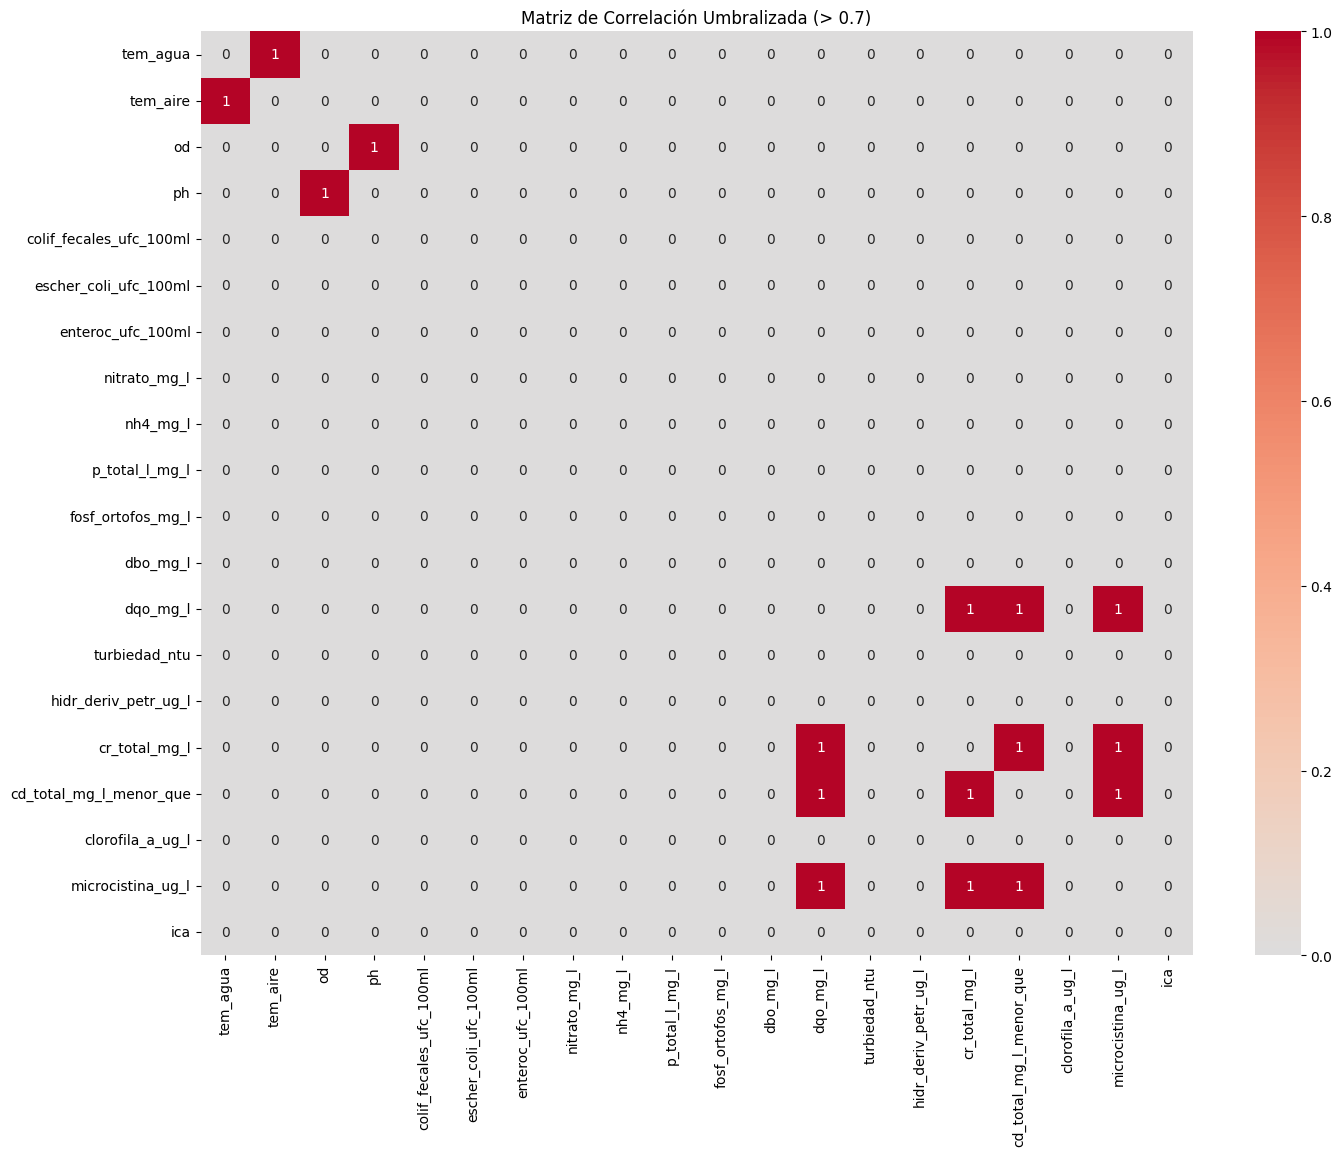

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculamos las correlaciones entre las variables cuantitativas
variables_cuantitativas = preprocessed_dataset.drop(['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'], axis=1)
correlation_matrix = variables_cuantitativas.corr()

# Tomamos el valor absoluto de las correlaciones y aplicamos un umbral mayor a 0.7
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.7

# Eliminamos la diagonal de la matriz (relación de una variable consigo misma)
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# Configuración del tamaño del gráfico
plt.figure(figsize=(16, 12))

# Creamos el heatmap con la matriz de correlación umbralizada
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap='coolwarm')

# Título del gráfico
plt.title('Matriz de Correlación Umbralizada (> 0.7)')

# Mostramos el gráfico
plt.show()


---

#### Visualización con Scatter Plots

En esta sección, exploramos las relaciones entre las variables que tienen una correlación alta, utilizando **gráficos de dispersión**. El objetivo es visualizar cómo se comportan las parejas de variables con correlaciones mayores a 0.7, lo que puede ser útil para entender mejor su relación y para la selección de características en modelos predictivos.

##### 1. Filtrar y Visualizar Correlaciones Fuertes

Para cada par de variables con una correlación superior al umbral de 0.7, vamos a generar un **gráfico de dispersión**. Esto nos permitirá visualizar si la relación entre las dos variables es lineal o si existe alguna tendencia clara entre ellas.

El siguiente código recorre la matriz de correlación umbralizada para identificar las correlaciones altas y luego genera los gráficos de dispersión para cada par de variables correlacionadas:


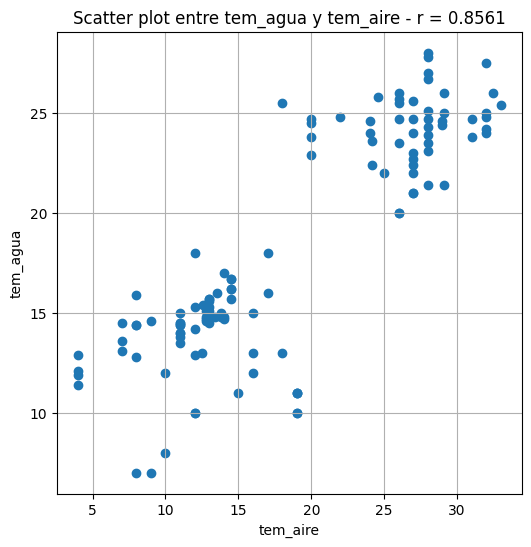

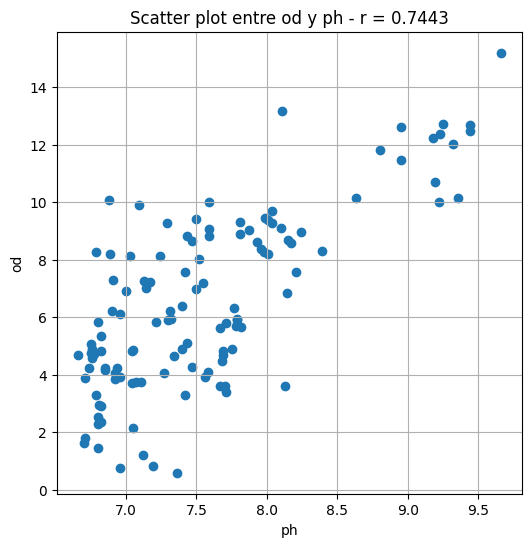

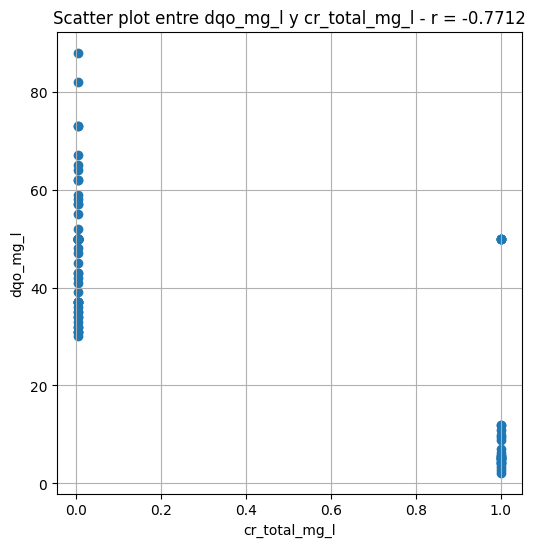

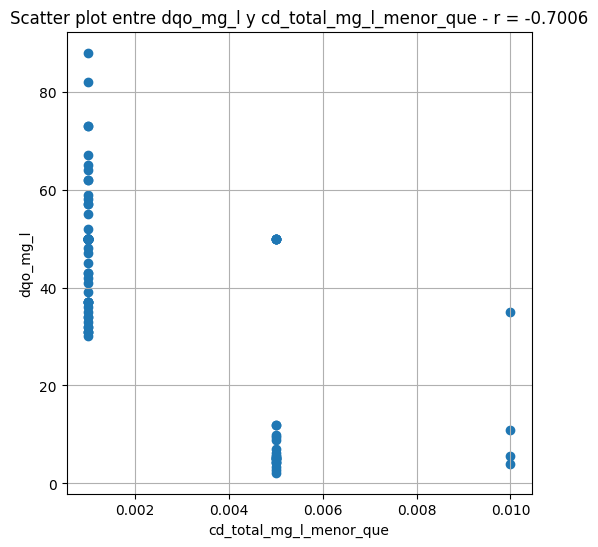

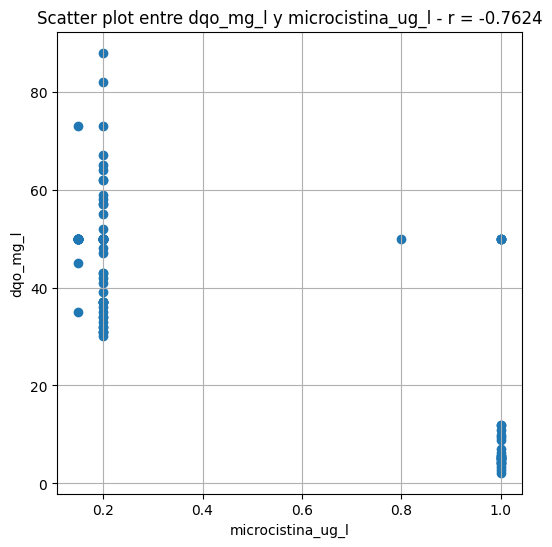

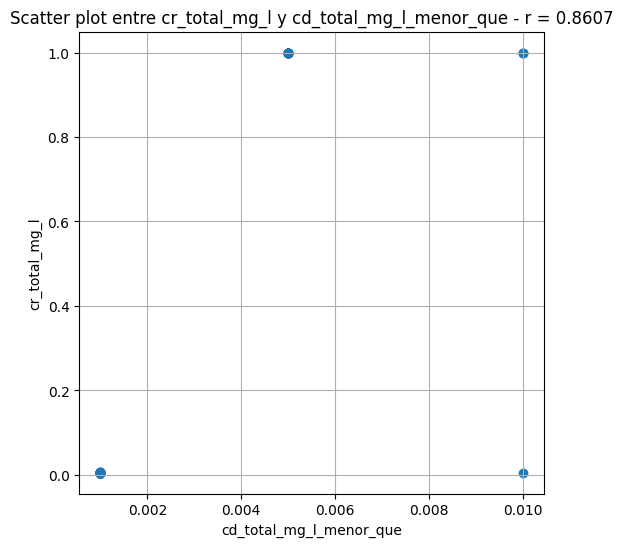

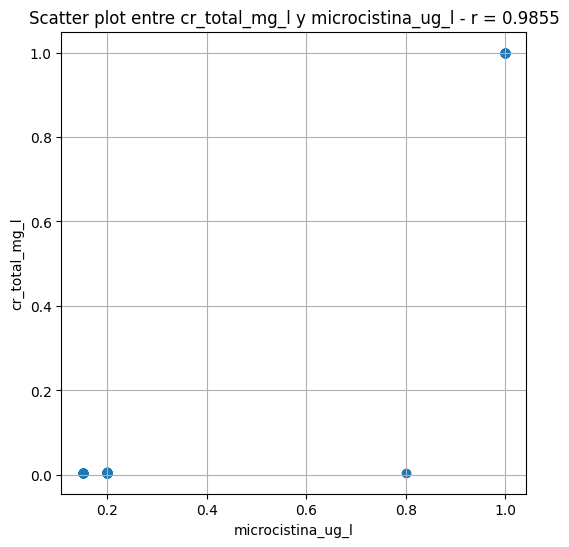

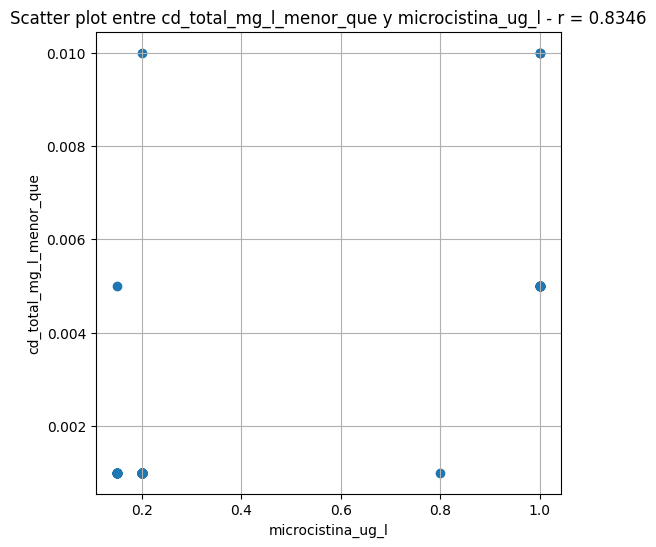

In [106]:
# Iteramos por cada columna y fila de la matriz de correlación umbralizada
for i, col in enumerate(correlation_matrix_umbralizada.columns): 
    # Iteramos por las filas correspondientes a cada columna
    for j in range(i, len(correlation_matrix_umbralizada.index)):
        # Extraemos el nombre de la fila
        row = correlation_matrix_umbralizada.index[j]
        
        # Si la correlación es alta (mayor a 0.7)
        if correlation_matrix_umbralizada.loc[row, col]:
        
            # Extraemos el valor de la correlación entre las variables
            correlation = correlation_matrix.loc[row, col]
            
            # Creamos un gráfico de dispersión
            plt.figure(figsize=(6, 6))
            plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
            
            # Añadimos título y etiquetas al gráfico
            plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
            plt.xlabel(row)
            plt.ylabel(col)
            plt.grid(True)
            
            # Mostramos el gráfico
            plt.show()

---
#### Generación de Reporte de Perfil de Datos

En esta sección, utilizamos la librería `ydata_profiling` para generar un reporte completo de perfil de los datos preprocesados. Este reporte incluye estadísticas descriptivas, distribución de las variables, correlaciones, valores faltantes, y otras métricas útiles para comprender mejor el conjunto de datos.

##### 1. Generación del Reporte Interactivo

El reporte será generado automáticamente y guardado en un archivo HTML. Este archivo se puede abrir para explorar los resultados de manera interactiva. Si el archivo ya ha sido creado previamente, el script lo detectará y no generará el reporte de nuevo.

El código a continuación realiza lo siguiente:

- **Verifica si el archivo de reporte ya existe**.
- **Genera el reporte de perfil** utilizando `ydata_profiling.ProfileReport`.
- **Guarda el reporte como un archivo HTML**.
- **Abre el archivo HTML en el navegador** para facilitar su visualización.

In [107]:
import webbrowser
from pathlib import Path
from ydata_profiling import ProfileReport

# Verificamos si el archivo ya existe
output_file = "calidad_del_agua_report.html"
if not Path(output_file).exists():
    try:
        # Generamos el reporte
        report = ProfileReport(preprocessed_dataset)
        
        # Guardamos el reporte como un archivo HTML
        report.to_file(output_file=output_file)
        print(f"Reporte generado y guardado como {output_file}.")
    except Exception as e:
        print(f"Ocurrió un error al generar el reporte: {e}")
else:
    print("El archivo ya está creado.")

# Abrir el archivo HTML en el navegador
webbrowser.open(output_file)


El archivo ya está creado.


True

In [108]:
preprocessed_dataset.columns

Index(['sitios', 'campaña', 'tem_agua', 'tem_aire', 'od', 'ph', 'olores',
       'color', 'espumas', 'mat_susp', 'colif_fecales_ufc_100ml',
       'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'nitrato_mg_l',
       'nh4_mg_l', 'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l',
       'dqo_mg_l', 'turbiedad_ntu', 'hidr_deriv_petr_ug_l', 'cr_total_mg_l',
       'cd_total_mg_l_menor_que', 'clorofila_a_ug_l', 'microcistina_ug_l',
       'ica', 'calidad_de_agua'],
      dtype='object')

In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = preprocessed_dataset.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

preprocessed_dataset_scaler = preprocessed_dataset.copy()
# Ajustamos el scaler a los datos y transformamos los datos
preprocessed_dataset_scaler[numeric_cols] = scaler.fit_transform(preprocessed_dataset[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
preprocessed_dataset_scaler.head()

,sitios,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,verano,0.885714,0.793103,0.227242,0.100000,False,False,False,True,...,0.0000,0.557110,0.733688,0.650594,0.0,0.000000,0.000000,0.000000,0.333333,Extremadamente deteriorada
1,Canal Villanueva y Río Luján,otoño,0.409524,0.310345,0.526352,0.043333,False,False,False,False,...,0.2625,0.557110,0.334221,0.720475,1.0,0.444444,0.045249,1.000000,0.458333,Muy deteriorada
2,Canal Villanueva y Río Luján,invierno,0.371429,0.310345,0.637235,0.143333,False,False,False,False,...,0.0000,0.557110,0.294274,0.650594,0.0,0.000000,0.045249,0.058824,0.791667,Muy deteriorada
3,Canal Villanueva y Río Luján,primavera,0.828571,0.862069,0.457906,0.083333,False,False,False,True,...,0.0000,0.335664,0.533955,0.650594,0.0,0.000000,0.016109,0.058824,0.604167,Muy deteriorada
5,Río Lujan y Arroyo Caraguatá,otoño,0.414286,0.310345,0.431896,0.113333,False,False,False,False,...,0.2875,0.557110,0.334221,1.000000,1.0,0.444444,0.045249,1.000000,0.270833,Extremadamente deteriorada


In [120]:
from sklearn.cluster import KMeans

nro_cluster = 3

# separamos las features de los nombres de los países
preprocessed_dataset_scaler = preprocessed_dataset_scaler.dropna()
sitios = preprocessed_dataset_scaler['sitios']
features_sitios = preprocessed_dataset_scaler.drop(columns=['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=nro_cluster, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_sitios)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(features_sitios)
print(clusters_kmeans)

[1 2 0 1 0 1 1 1 1 1 1 2 1 0 1 1 2 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 2 1 0 1 1
 2 0 1 0 2 0 1 2 0 2 0 1 0 1 1 2 0 1 0 1 0 1 0 0 0]


In [121]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Sitios': sitios, 'Cluster': clusters_kmeans})

# Imprimimos los países de cada cluster
for cluster_num in range(nro_cluster):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Sitios'].tolist())


Cluster 0:
['Canal Villanueva y Río Luján', 'Río Lujan y Arroyo Caraguatá', 'Río Capitán y Río San Antonio', 'Del Arca', 'Reserva Ecológica', 'Reserva Barrio El Ceibo ', 'Costa de Villa Domínico     ', 'Arroyo Santo Domingo', 'Náutico 400 m', 'Pejerrey Club 400 m', 'Calle 14 y Costa - Salida cloaca', 'Costanera Hudson Calle 63', 'Camping Eva Perón', 'Toma de agua Club de Pesca', 'Arroyo El Gato', 'Ensenada Prefectura Isla Santiago', 'Balneario Palo Blanco', 'Balneario Municipal', 'Playa La Balandra', 'Playa La Balandra', 'Playa La Balandra']

Cluster 1:
['Canal Villanueva y Río Luján', 'Canal Villanueva y Río Luján', 'Río Lujan y Arroyo Caraguatá', 'Canal Aliviador y Río Lujan', 'Río Carapachay y Arroyo Gallo Fiambre', 'Río Carapachay y Arroyo Gallo Fiambre', 'Río Reconquista y Río Lujan', 'Río Reconquista y Río Lujan', 'Río Capitán y Río San Antonio', 'Río Capitán y Río San Antonio', 'Arroyo Abra Vieja y Santa Rosa', 'Arroyo Abra Vieja y Santa Rosa', 'Del Arca', 'Reserva Ecológica', 

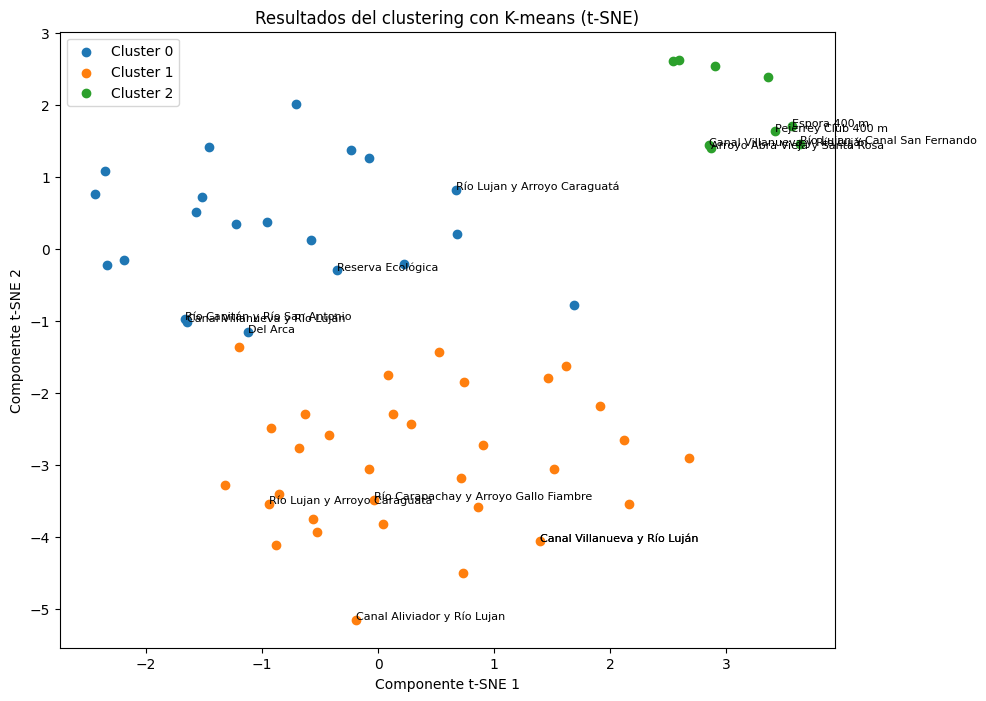

In [122]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_sitios)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Country': sitios})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(nro_cluster):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

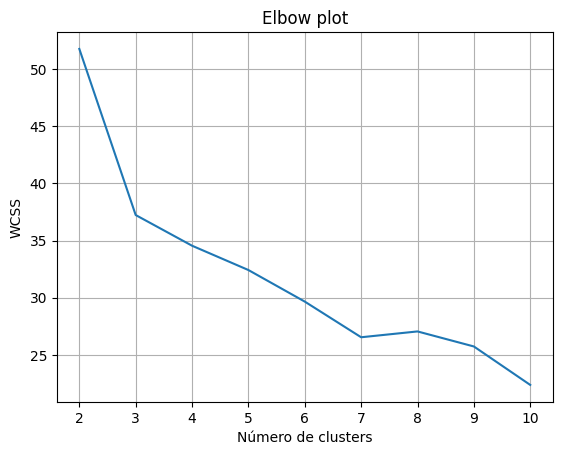

In [113]:
from sklearn.cluster import KMeans

# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_sitios)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [114]:
# inicializamos un contador
counter = 0
# creamos una lista para guardar los valores únicos
unique_values = []
# iteramos sobre los valores de la columna
for val in preprocessed_dataset["sitios"]:
  # si el valor incluye "Data Scientist"
  if "Playa" in val or "cloaca" in val  or "Balneario" in val or "Pesca" in val or "Club" in val or "Puerto" in val:
    # incrementamos el contador
    counter += 1
    # si el valor no esta en la lista de valores únicos
    if val not in unique_values:
      # lo agregamos
      unique_values.append(val)

# imprimimos el contador y la lista de valores únicos
print("Cantidad de valores que incluyen 'Playa' o  cloaca:", counter)
print("Valores únicos:", unique_values)
unique_values

Cantidad de valores que incluyen 'Playa' o  cloaca: 36
Valores únicos: ['Playa Espigón de Pacheco', 'Puerto de Olivos Espigón', 'Pejerrey Club 400 m', 'Calle 14 y Costa - Salida cloaca', 'Puerto Trinidad calle 47', 'Toma de agua Club de Pesca', 'Balneario Palo Blanco', 'Diagonal 66 (descarga cloaca)', 'Playa La Bagliardi', 'Balneario Municipal', 'Playa La Balandra']


['Playa Espigón de Pacheco',
 'Puerto de Olivos Espigón',
 'Pejerrey Club 400 m',
 'Calle 14 y Costa - Salida cloaca',
 'Puerto Trinidad calle 47',
 'Toma de agua Club de Pesca',
 'Balneario Palo Blanco',
 'Diagonal 66 (descarga cloaca)',
 'Playa La Bagliardi',
 'Balneario Municipal',
 'Playa La Balandra']

In [115]:

datos_contactos = preprocessed_dataset[preprocessed_dataset['sitios'].isin(unique_values)]
datos_contactos.columns

Index(['sitios', 'campaña', 'tem_agua', 'tem_aire', 'od', 'ph', 'olores',
       'color', 'espumas', 'mat_susp', 'colif_fecales_ufc_100ml',
       'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'nitrato_mg_l',
       'nh4_mg_l', 'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l',
       'dqo_mg_l', 'turbiedad_ntu', 'hidr_deriv_petr_ug_l', 'cr_total_mg_l',
       'cd_total_mg_l_menor_que', 'clorofila_a_ug_l', 'microcistina_ug_l',
       'ica', 'calidad_de_agua'],
      dtype='object')

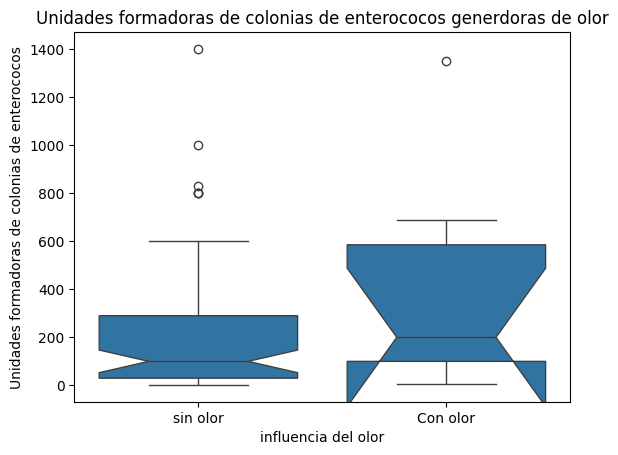

In [116]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='olores', y='enteroc_ufc_100ml', data=preprocessed_dataset, notch=True)
plt.title("Unidades formadoras de colonias de enterococos generdoras de olor")
plt.xlabel("influencia del olor")
plt.xticks(ticks=[0, 1], labels=["sin olor", "Con olor"])
plt.ylabel("Unidades formadoras de colonias de enterococos")
plt.show()

In [117]:
from scipy.stats import shapiro

# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
con_olor = preprocessed_dataset[preprocessed_dataset['olores'] == True]['enteroc_ufc_100ml']
sin_olor = preprocessed_dataset[preprocessed_dataset['olores'] == False]['enteroc_ufc_100ml']

#Analizamos normalidad
# Test de Shapiro-Wilk para datos con olor
stat, p = shapiro(con_olor)
print(f"Test de Shapiro-Wilk para datos con olores: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(sin_olor)
print(f"Test de Shapiro-Wilk para datos sin olores: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para datos con olores: Estadístico=nan, p-valor=nan
Test de Shapiro-Wilk para datos sin olores: Estadístico=nan, p-valor=nan


Vemos que los p valor que obtuvimos son menores a nuestro nivel de confianza por lo que los datos no son normales. Por lo que no es posible hacer un test t para estas variables pero evaluaremos homocedasticidad para ver si podemos hacer el test Mann Whitney

In [118]:
# Test de Levene para comparar homocedasticidad
import scipy.stats as stats
stat, p = stats.levene(sin_olor, con_olor)
print(f"Test de Levene para enteroc_ufc_100ml: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para enteroc_ufc_100ml: Estadístico=nan, p-valor=nan


Dado que el p valor es menor a 0,05 podemos ver que no hay homocedasticidad por lo que nos inclinaremos por un testeo de Kruskall-Wallis

In [119]:
# Test de Kruskal-Wallis para comparar enteroc_ufc_100ml entre lugares con y sin olor
stat, p = stats.kruskal(sin_olor, con_olor)
print(f"Test de Kruskal-Wallis para enteroc_ufc_100ml: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el enteroc_ufc_100ml entre lugares con olor y lugares sin olor.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el enteroc_ufc_100ml entre lugares con olor y lugares sin olor")

Test de Kruskal-Wallis para enteroc_ufc_100ml: Estadístico=nan, p-valor=nan
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el enteroc_ufc_100ml entre lugares con olor y lugares sin olor


git add .
git commit -m "Actualizacion de los datos"
git push origin main